# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [3]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas.tseries as pts
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [3]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print(df_raw.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [4]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400, there are missing values

#### Question 2. Create a summary table

In [6]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The range of GRE is a lot higher than GPA

#### Question 4. Drop data points with missing data


In [8]:
df_nomissing=df_raw.dropna()
df_nomissing.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: Now all the counts are the same. There is no significant differenece of all charateristics of the data

#### Question 6. Create box plots for GRE and GPA

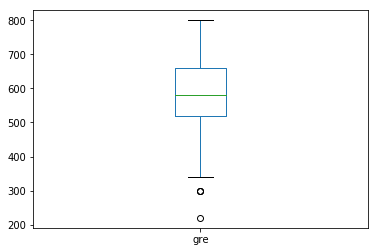

In [10]:
#boxplot 1
df_nomissing['gre'].plot(kind='box')

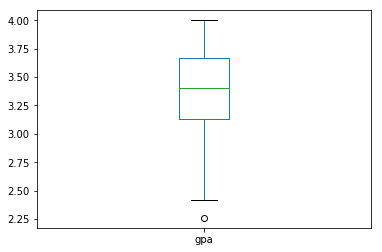

In [11]:
#boxplot 2 
df_nomissing['gpa'].plot(kind='box')

#### Question 7. What do this plots show?

Answer: GPA data has more outliers than GRE data. GRE data is more normal distributed.

#### Question 8. Describe each distribution 

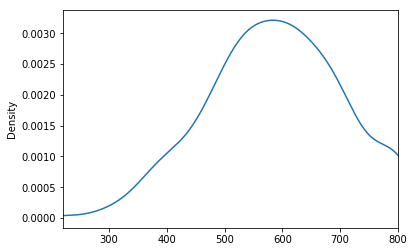

In [23]:
#plot the distribution of each variable 
df_nomissing['gre'].plot(kind="density",xlim=(220,800))

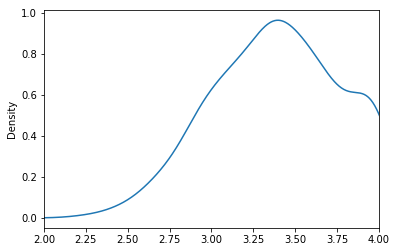

In [24]:
# plot the distribution of each variable 
df_nomissing['gpa'].plot(kind="density",xlim=(2,4))

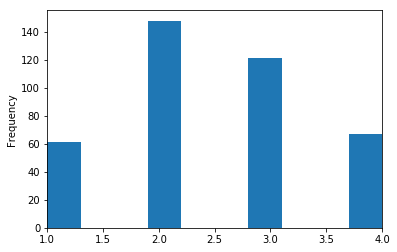

In [26]:
# plot the distribution of each variable 
df_nomissing['prestige'].plot(kind="hist",xlim=(1,4))

In [18]:
df_nomissing.skew()

admit       0.787669
gre        -0.146047
gpa        -0.216889
prestige    0.086506
dtype: float64

In [20]:
df_nomissing.kurt()

admit      -1.386588
gre        -0.332864
gpa        -0.563570
prestige   -0.901038
dtype: float64

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: The three variables are not completely fitting the normal distribution, the skewness, kurtosis are not zeros. The most closely matched variables is GRE.

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: It is understandable that most applicants for UCLA's graduate program are the ones with relatively good GRE and GPS scores, and from good schools, so the distribution will be skewed left. We can correct it using bigger pools from general GPA and GRE national colledge graduates data, and all college prestige score.

#### Question 11. Which of our variables are potentially colinear? 

In [27]:
# create a correlation matrix for the data
df_nomissing.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: The only possible colinear might exist between "GRE" and "GPA"

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: Run regression analysis between admissions and prestige score. Then we can based on the null analysis to understand the relationship.

#### Question 14. What is your hypothesis? 

Answer: The acceptance rate is higher for more prestigous school. Within the same school type, higher GRE and GPA has more likelihood to be accepted.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

Using mean score of each data set to fill missing score.

#### 2. Bonus: Log transform the skewed data

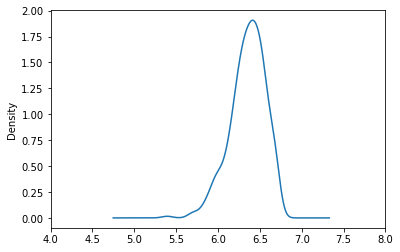

In [35]:
df_nomissing['gre'].apply(np.log).plot(kind="density",xlim=(4,8))

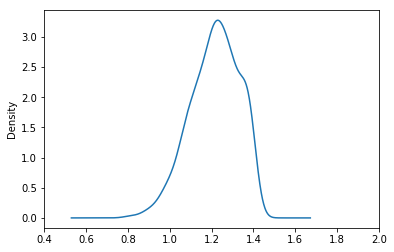

In [37]:
df_nomissing['gpa'].apply(np.log).plot(kind="density",xlim=(0.4,2))

#### 3. Advanced: Impute missing data

In [44]:
a=df_raw.median()
df_new=df_raw.fillna(a)

In [45]:
df_new.describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,588.000000,3.390950,2.48500
std,0.466087,115.339751,0.379675,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000
